# TASK8.1- Classical View

There are 20 images that contain red and blue balls, implementing a
classical algorithm using OpenCV, that detects the balls in the images

**Importing Images**

In [1]:
! pip install Pillow


In [2]:
! pip install opencv-python-headless


**Importing Libraries**

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Importing Images**

In [3]:
directory_path = 'balls/'

# Steps of object detection
**1-HVS : (Hue, Saturation, Value)**
Switching to the HSV color space proves invaluable in tasks such as identifying objects based on color or segmenting images.In contour detection, the conversion to the HSV color space  is particularly useful because it separates the information about color and brightness more intuitively than the traditional RGB color space (Red, Green, Blue).

**2-Thresholding**
Thresholding is applied using the defined color ranges. This creates binary masks (`red_mask and blue_mask`) where white pixels represent the detected red and blue regions.
`cv2.inRange()` is a function in OpenCV used for thresholding. It checks for pixel values in the input array .

**3-Contour Detection and Filtering**
this finds contours in the binary masks using OpenCV's findContours function. 

**4-Draw Bounding Boxes**
For each detected contour, it calculates the bounding rectangle and draws it on the original image. Red bounding boxes are drawn for red balls, and blue bounding boxes for blue balls.


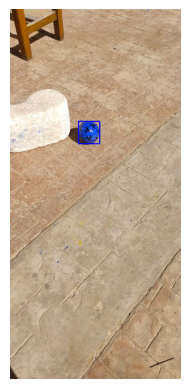

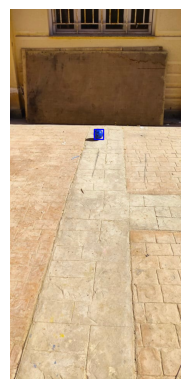

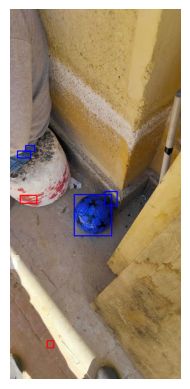

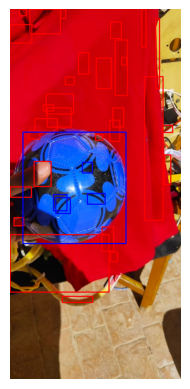

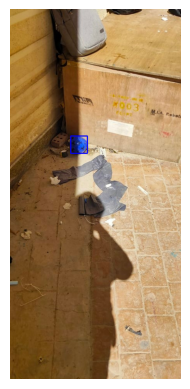

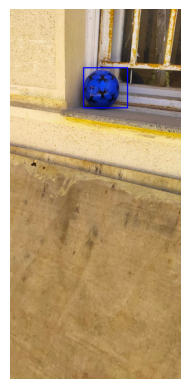

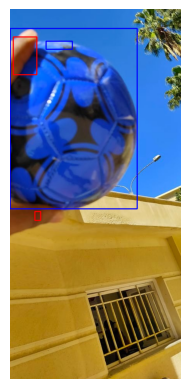

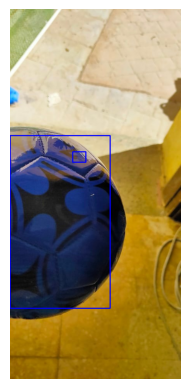

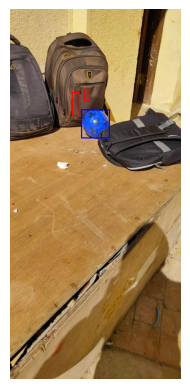

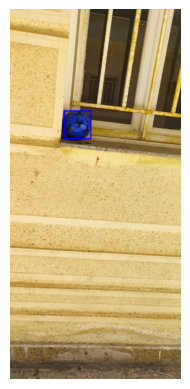

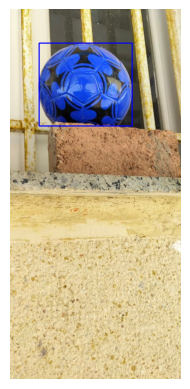

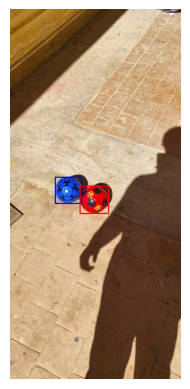

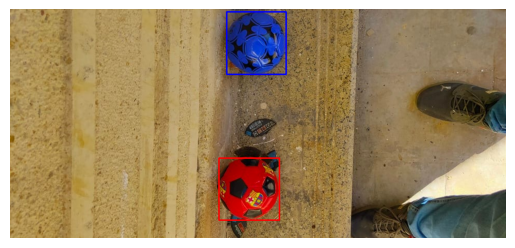

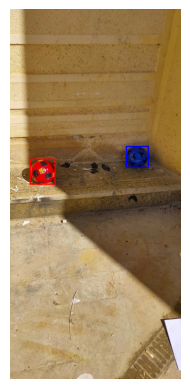

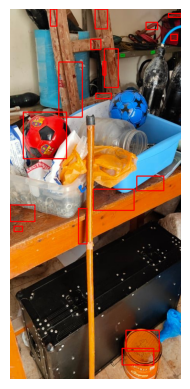

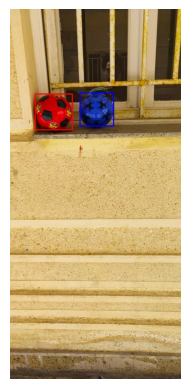

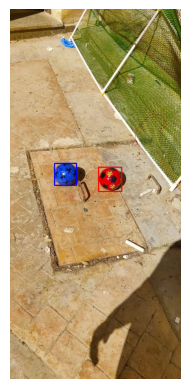

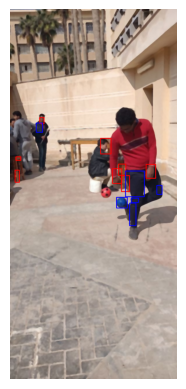

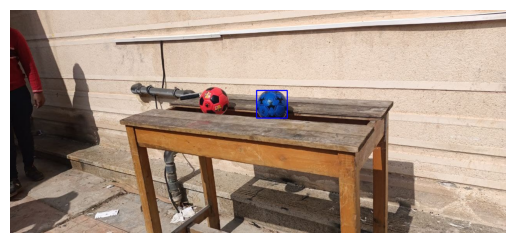

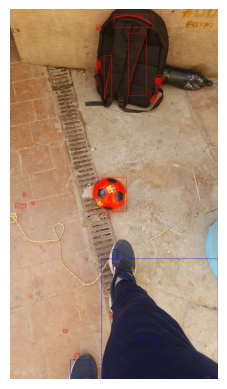

In [7]:
for filename in os.listdir(directory_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(directory_path, filename)
        image = cv2.imread(image_path)
        
        # Convert the image to HSV color space
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # lower and upper bounds for red and blue in HSV color space
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])
        lower_blue = np.array([110, 50, 50])
        upper_blue = np.array([130, 255, 255])

        # Threshold of red and blue regions
        red_mask = cv2.inRange(hsv, lower_red, upper_red)
        blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

        min_contour_area = 100  
        contours_red, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours_red = [cnt for cnt in contours_red if cv2.contourArea(cnt) > min_contour_area]
        
        contours_blue, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours_blue = [cnt for cnt in contours_blue if cv2.contourArea(cnt) > min_contour_area]

        #bounding boxes around red balls
        for contour in contours_red:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        #  bounding boxes around blue balls
        for contour in contours_blue:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        output_path = os.path.join('output_images', filename)  #  a directory for output images
        cv2.imwrite(output_path, image)

**Built-in Functions**
1. `cv2.cvtColor(src, code)`
   - **Definition**: Converts an image from one color space to another.
   - **Library**: OpenCV (cv2) - Computer Vision library.

2. `cv2.inRange(src, lowerb, upperb)`
   - **Definition**: Checks if array elements are within the specified range .
   - **Library**: OpenCV (cv2) - Computer Vision library.

3. `cv2.findContours(image, mode, method)`
   - **Definition**: Finds contours in a binary image.
   - **Library**: OpenCV (cv2) - Computer Vision library.

4. `cv2.boundingRect(points)`
   - **Definition**: Calculates the up-right bounding rectangle of a point set.
   - **Library**: OpenCV (cv2) - Computer Vision library.
